## Simulation of the Process in "Local dispersal promotes biodiversity in a real-life game of rock–paper–scissors" (Kerr et. al.)

Link to the article: [Local dispersal promotes biodiversity in a real-life game of rock–paper–scissors](https://www.nature.com/articles/nature00823)

### Lattice-based simulation description (Kerr. et. al)
We embedded our virtual C-S-R community in a $250 \times 250$ regular square lattice with periodic (or 'wrap-around') boundaries. To start the simulations shown in Fig. 1, every lattice point was randomly and independently assigned one of the following states: occupation by a $C, S$ or $R$ cell or the 'empty state'. We used an asynchronous updating scheme, which consisted of sequentially picking random focal points and probabilistically changing their states. The state transition probabilities of a focal point depend both on its current state and the states of points within its neighbourhood. The size of a neighbourhood represents the spatial scale of ecological processes. To explore the role of spatial scale, we simulated our community using two different neighbourhood sizes. The 'local' neighbourhood consisted of the eight lattice points directly surrounding a focal point; in such a case, interaction (that is, killing and competition for space) and dispersal (that is, 'birth') are local. The 'global' neighbourhood consisted of every point in the grid outside of a focal point; in this case, interaction and dispersal are no longer exclusively local, and the community behaves like a wellmixed system. For either neighbourhood, if an empty lattice point is selected for updating, the probability that it is filled with a cell of type $i$ (with $i \in\{C, S, R\}$ ) is given by $f_{i}$, the fraction of its neighbourhood occupied by strain $i$. If an occupied lattice point in state $i$ is selected, it is killed with probability $\Delta_{i}$. Although $\Delta_{\mathrm{C}}$ and $\Delta_{\mathrm{R}}$ are fixed values, $\Delta_{\mathrm{S}}$ is not; it is equal to $\Delta_{\mathrm{S}, 0}+\tau\left(f_{\mathrm{C}}\right)$, where $\Delta_{\mathrm{S}, 0}$ is the probability of death of an $\mathrm{S}$ cell without any neighbouring $\mathrm{C}$ cells, and $\tau$ measures the toxicity of neighbouring $C$ cells.

### Color Reference
##### Red = C, Orange = S, Gray = R

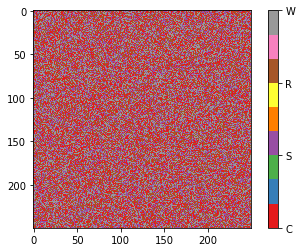

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import random
 
nums = [0,1,2,3]
a = 1/4
b = 1/4
probs = [a, a, b, 1-a-a-b]

grid_size = 250 #change accordingly
s_dict = {0:'C', 1:'S', 2:'R', 3:'W'} 
s_dict_rev = {value : key for (key, value) in s_dict.items()}
 
arr = np.zeros((grid_size,grid_size))
 
for i in range(grid_size):
    for j in range(grid_size):
        arr[i,j] = random.choices(nums, weights=probs)[0]
plt.imshow(arr, interpolation='none', cmap=plt.get_cmap('Set1'))
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(["C", "S", "R", "W"])
plt.clim(0,3)
plt.show()

In [5]:
def randomPoint(grid_size = 250):
    return random.choices(range(grid_size), k=2)

  0%|          | 0/18750000 [00:00<?, ?it/s]

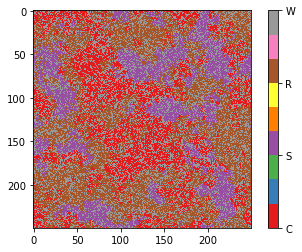

In [7]:
#Simulate nbhood = 8 cells
num_iters = 18750000
delta_c = 1/3 #change accordingly
delta_r = 10/32 #change accordingly
T = 3/4 # toxicity, change accordingly
delta_s_0 = 1/4 #change accordingly
for _ in tqdm(range(num_iters)):
    death_prob = random.random()
    p = randomPoint(grid_size)
    curr_p = arr[p[0], p[1]]
    f_c=0
    f_s=0
    f_r=0
    for i in range(-1,2):
        for j in range(-1,2):
            if not (i==0 and j==0):
                nb = arr[(p[0]+i)%grid_size, (p[1]+j)%grid_size]
                if nb == 0:
                    f_c = f_c+1
                if nb == 1:
                    f_s = f_s+1
                if nb == 2:
                    f_r = f_r+1
    f = [f_c/8, f_s/8, f_r/8]
    delta_s = delta_s_0 + T*f[0]
    
    if curr_p == 3 and death_prob < f[0]:
        arr[p[0], p[1]] = 0
    if curr_p == 3 and death_prob > f[0] and death_prob < f[0]+f[1]:
        arr[p[0], p[1]] = 1
    if curr_p == 3 and death_prob > f[0]+f[1] and death_prob < f[0]+f[1]+f[2]:
        arr[p[0], p[1]] = 2
    if curr_p == 3 and death_prob > f[0]+f[1]+f[2]:
        arr[p[0], p[1]] = 3
         
    if curr_p == 0 and death_prob < delta_c:
        arr[p[0], p[1]] = 3
    if curr_p == 1 and death_prob < delta_s:
        arr[p[0], p[1]] = 3
    if curr_p == 2 and death_prob < delta_r:
        arr[p[0], p[1]] = 3
        
# display grid
plt.imshow(arr, interpolation='none', cmap=plt.get_cmap('Set1'))
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(["C", "S", "R", "W"])
plt.clim(0,3)
plt.show()

  0%|          | 0/10000000 [00:00<?, ?it/s]

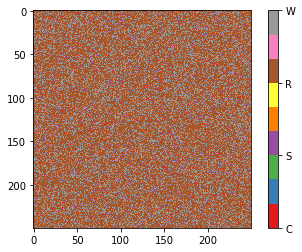

In [8]:
#Simulate nbhood global
num_iters = 10000000
delta_c = 1/3 #change accordingly
delta_r = 10/32 #change accordingly
T = 3/4 # toxicity, change accordingly
delta_s_0 = 1/4 #change accordingly
for _ in tqdm(range(num_iters)):
    death_prob = random.random()
    p = randomPoint(grid_size)
    curr_p = arr[p[0], p[1]]
    f_c=0
    f_s=0
    f_r=0
    
    f_c = np.count_nonzero(arr == 0)
    f_s = np.count_nonzero(arr == 1)
    f_r = np.count_nonzero(arr == 2)
    
    if curr_p == 0:
        f_c = f_c-1
    if curr_p == 1:
        f_s = f_s-1
    if curr_p == 2:
        f_r = f_r-1
                
    f = [f_c/(grid_size**2-1), f_s/(grid_size**2-1), f_r/(grid_size**2-1)]
    delta_s = delta_s_0 + T*f[0]
    if curr_p == 0 and death_prob < delta_c:
        arr[p[0], p[1]] = 3
    if curr_p == 1 and death_prob < delta_s:
        arr[p[0], p[1]] = 3
    if curr_p == 2 and death_prob < delta_r:
        arr[p[0], p[1]] = 3
    
    if curr_p == 3 and death_prob < f[0]:
        arr[p[0], p[1]] = 0
    if curr_p == 3 and death_prob > f[0] and death_prob < f[0]+f[1]:
        arr[p[0], p[1]] = 1
    if curr_p == 3 and death_prob > f[0]+f[1] and death_prob < f[0]+f[1]+f[2]:
        arr[p[0], p[1]] = 2
    if curr_p == 3 and death_prob > f[0]+f[1]+f[2]:
        arr[p[0], p[1]] = 3
        
#display grid
plt.imshow(arr, interpolation='none', cmap=plt.get_cmap('Set1'))
cbar = plt.colorbar()
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(["C", "S", "R", "W"])
plt.clim(0,3)
plt.show()